### Réalisé par
-  Serine Issaad
-  Touil Ines

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
from IPython.display import Image

Type of image:  <class 'numpy.ndarray'>


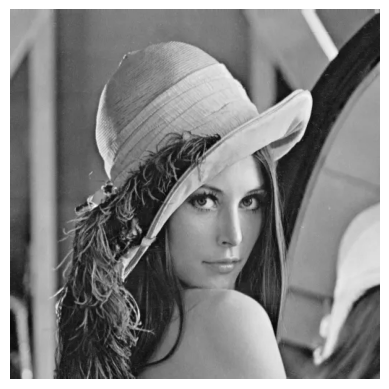

Type of image:  <class 'list'>


In [2]:
# Lire l'image en niveau de gris
image = cv.imread('image.png', cv.IMREAD_GRAYSCALE)
image1 = cv.imread('image.png')

# Type de l'image
print('Type of image: ', type(image1))
plt.imshow(image, cmap='gray')
plt.axis('off')  
plt.show()

im = image.tolist()
print('Type of image: ', type(im))


## 1. Histogramme

In [3]:
def getHist(img):
    # hist is a list of 256 zeros
    hist = [0] * 256
        
    for i in range(len(img)):
        for j in range(len(img[0])):
            pixel_value = int(img[i][j]) 
            hist[pixel_value] += 1
    return hist

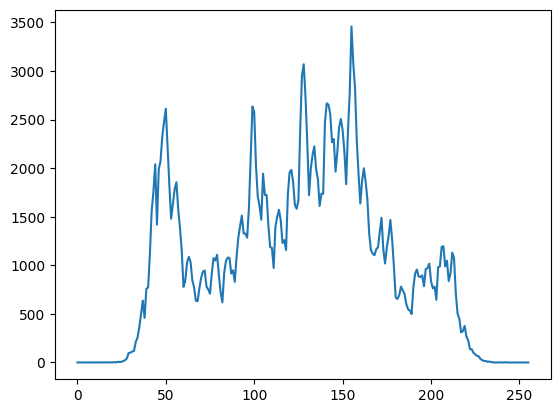

In [4]:
# Histogramme de l'image
hist = getHist(im)
plt.plot(hist)
plt.show()

In [5]:
#A.Normalisation d'histogramme

def normalizeHist(hist,img):
    for i in range(len(hist)):
        hist[i] = hist[i]/(len(img)*len(img[0]))
    return hist

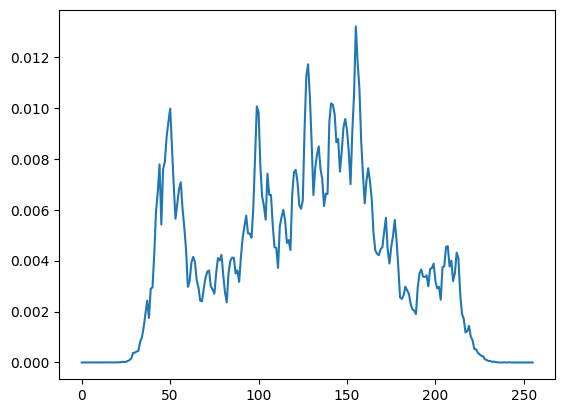

In [6]:
# Histogramme normalisé
normhist = normalizeHist(hist,im)
plt.plot(normhist)
plt.show()

In [7]:
#B. Etirement d'histogramme
def stretch(img, a=0, b=255):
    nmin = 255
    nmax = 0

    # Trouver les valeurs minimales et maximales dans l'image
    for i in range(len(img)):
        for j in range(len(img[0])):
            pixel_value = int(img[i][j])
            if pixel_value < nmin:
                nmin = pixel_value
            if pixel_value > nmax:
                nmax = pixel_value

    print("Min:", nmin, "Max:", nmax)

    # Appliquer la transformation d'étirement
    k = b - a
    stretched = [[0] * len(img[0]) for _ in range(len(img))]

    for i in range(len(img)):
        for j in range(len(img[0])):
            stretched[i][j] = int(k * ((img[i][j] - nmin) / (nmax - nmin)) + a)

    return stretched

Min: 20 Max: 242


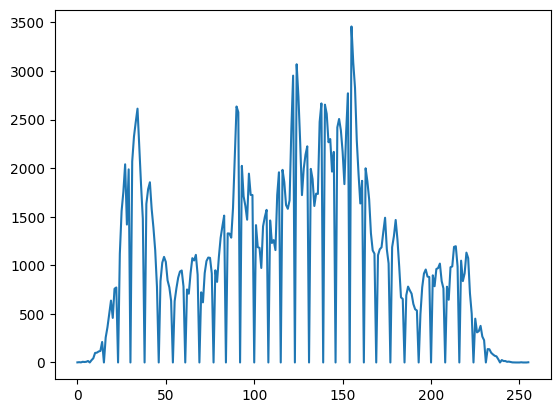

In [8]:
strimg = stretch(image)

#cv.imshow('Stretched image', strimg.astype(np.uint8))
#cv.imshow('Normal image',image)

#cv.waitKey(0)
#cv.destroyAllWindows()

strhist = getHist(strimg)
plt.plot(strhist)
plt.show()

In [9]:
def cumulatedHist(hist):
    cumulated = [0] * len(hist)
    cumulated[0] = hist[0]
    for i in range(1, len(hist)):
        cumulated[i] = cumulated[i-1] + hist[i]
    return cumulated

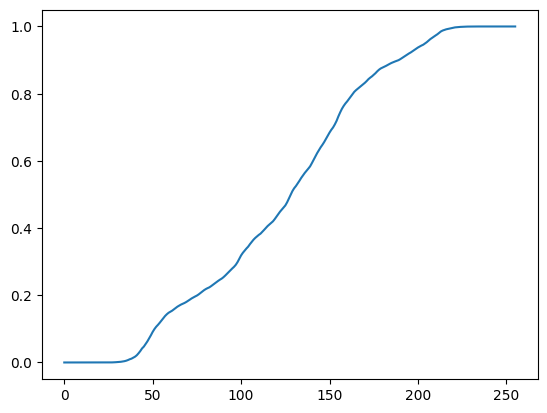

In [10]:
cumulatedhist = cumulatedHist(hist)

plt.plot(cumulatedhist)
plt.show()

In [11]:
def egaliser_histogramme(cumulatedhist, image):
    # Normaliser l'histogramme cumulé
    histogramme_cumule_normalise = [(hc * (2**8 - 1)) / cumulatedhist[-1] for hc in cumulatedhist]

    # Appliquer la transformation d'égalisation
    image_egalisee = [[0 for _ in range(len(image[0]))] for _ in range(len(image))]

    for i in range(len(image)):
        for j in range(len(image[0])):
            pixel = image[i][j]
            image_egalisee[i][j] = int(histogramme_cumule_normalise[pixel])

    return image_egalisee


In [15]:
import numpy as np
image_egalisee = np.array(egaliser_histogramme(cumulatedhist,image), dtype=np.uint8)

cv.imshow('Image Originale', image)
cv.imshow('Image Egalisee', image_egalisee)
cv.waitKey(0)
cv.destroyAllWindows()

## 2. Produit de Convolution et Filtrage

In [16]:
def conv(image, filter):
    image_height = len(image)
    image_width = len(image[0])
    filter_height = len(filter)
    filter_width = len(filter[0])

    # Le padding est la moitié de la taille du filtre
    pad_height = filter_height // 2
    pad_width = filter_width // 2

    # Créer une image avec un padding donc taille de l'image + 2*pad_height et 2*pad_width
    padded_image = [[0 for _ in range(image_width + 2 * pad_width)] for _ in range(image_height + 2 * pad_height)]

    # Copier l'image dans le centre de la nouvelle image avec padding
    for i in range(image_height):
        for j in range(image_width):
            padded_image[i + pad_height][j + pad_width] = image[i][j]

    output_image = np.zeros_like(image)

    for i in range(image_height):
        for j in range(image_width):

            # Extraire la région de l'image avec la taille du filtre (pour le calcul de la convolution)
            region = np.zeros((filter_height, filter_width))
            for k in range(filter_height):
                for l in range(filter_width):
                    region[k][l] = padded_image[i + k][j + l]

            # Calculer la convolution entre la région et le filtre
            conv_sum = 0
            for k in range(filter_height):
                for l in range(filter_width):
                    conv_sum += region[k][l] * filter[k][l]

            # Mettre à jour la valeur du pixel dans l'image de sortie
            output_image[i][j] = min(max(conv_sum, 0), 255)


    return output_image


In [17]:
contrast_kernel = np.array([[-1, -1, -1],
                            [-1, 8, -1],
                            [-1, -1, -1]])
blur_kernel = np.array([[1, 2, 1],
                   [2, 4, 2],
                   [1, 2, 1]]) / 16

image_contrast = conv(image, contrast_kernel)
image_contrast_cv2 = cv.filter2D(image, -1, contrast_kernel)
blur_image = conv(image, blur_kernel)

cv.imshow('Contrast', image_contrast)
cv.imshow('Contrast CV2', image_contrast_cv2) # Comparaison de notre fonction avec celle de OpenCV
cv.imshow('Blur2', blur_image)
cv.waitKey(0)
cv.destroyAllWindows()